In [102]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import json
from sklearn.preprocessing import StandardScaler

turning an image into array

In [103]:
temp_img = load_img('./cropped/0.jpg', color_mode='grayscale')

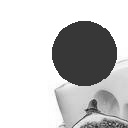

In [104]:
temp_img

In [105]:
temp_img_array = img_to_array(temp_img)

In [106]:
temp_img_array.shape

(128, 128, 1)

In [107]:
def generate_dataset():
    X = []
    Y = []
    
    # X
    files = glob.glob('./cropped/*.jpg')
    files.sort()
    for f in files[:100]:
        temp_img = load_img(f, color_mode='grayscale')
        arr      = img_to_array(temp_img)
        X.append(arr)
    X = np.asarray(X)
    X = X.astype('float32')
    X = X / 255.0
    
    # Y
    with open('labels.json') as f:
        data = json.load(f)
    for d in data[:100]:
        y = [(d['center'][0]-64), (d['center'][1]-64), d['radius']]
        Y.append(y)
    Y = np.asarray(Y)
    Y = Y.astype('float32')
    return X, Y

In [108]:
X, Y = generate_dataset()

In [109]:
X.shape

(100, 128, 128, 1)

In [110]:
Y

array([[ 20., -11.,  32.],
       [  2.,   5.,  14.],
       [ -8.,  -3.,   8.],
       [  4.,  11.,  12.],
       [  2., -17.,  29.],
       [ -6., -16.,  21.],
       [-15., -17.,  20.],
       [  7., -20.,  20.],
       [  1.,  14.,  28.],
       [ 14.,  -2.,  29.],
       [ 17.,   0.,  24.],
       [ 12.,  15.,  35.],
       [  7., -11.,  39.],
       [ 13.,  11.,  22.],
       [ -2.,   0.,   9.],
       [ 18.,   9.,   7.],
       [ -6., -12.,  21.],
       [  4.,  -8.,   8.],
       [-11.,   0.,  12.],
       [  5., -17.,  32.],
       [ 19.,  10.,  17.],
       [ 16., -18.,   9.],
       [-12.,  16.,  28.],
       [ 18.,  18.,  35.],
       [ -9.,  -4.,  19.],
       [ -2.,   5.,  31.],
       [-20.,   7.,  25.],
       [ -3.,  15.,   5.],
       [ -2.,  -9.,  25.],
       [  1., -10.,  10.],
       [ -4.,  16.,  21.],
       [  6.,  17.,  38.],
       [ -8.,  17.,  36.],
       [ 19.,   1.,  38.],
       [ -4.,  11.,  15.],
       [-12.,  -4.,  36.],
       [-19.,  14.,  24.],
 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)


In [112]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
# コンパイル
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])



In [113]:
# 実行。出力はなしで設定(verbose=0)。
history = model.fit(X_train, y_train, batch_size=5, epochs=10,
                   validation_data = (X_test, y_test))


Epoch 1/10
14/14 [==============================] - 4s 231ms/step - loss: 2106.4397 - mean_squared_error: 2106.4397 - val_loss: 281.6548 - val_mean_squared_error: 281.6548
Epoch 2/10
14/14 [==============================] - 3s 227ms/step - loss: 581.8940 - mean_squared_error: 581.8941 - val_loss: 249.2140 - val_mean_squared_error: 249.2140
Epoch 3/10
14/14 [==============================] - 3s 217ms/step - loss: 364.7708 - mean_squared_error: 364.7708 - val_loss: 205.0144 - val_mean_squared_error: 205.0144
Epoch 4/10
14/14 [==============================] - 3s 220ms/step - loss: 202.9964 - mean_squared_error: 202.9964 - val_loss: 221.8192 - val_mean_squared_error: 221.8192
Epoch 5/10
14/14 [==============================] - 3s 222ms/step - loss: 180.9601 - mean_squared_error: 180.9601 - val_loss: 169.5257 - val_mean_squared_error: 169.5257
Epoch 6/10
14/14 [==============================] - 4s 259ms/step - loss: 146.6031 - mean_squared_error: 146.6031 - val_loss: 159.2812 - val_mean_sq

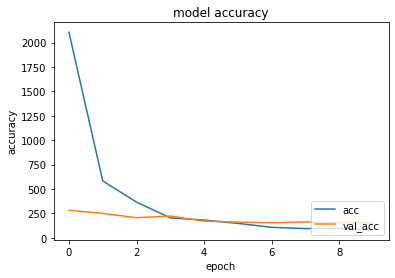

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [115]:
y_train[0]

array([-8., 17., 36.], dtype=float32)

In [116]:
model.predict(X_test)[:10]

array([[ 2.5894544 , -4.7751293 , 16.881922  ],
       [ 2.5993423 , -4.975272  , 17.073952  ],
       [ 3.0681818 , -3.2978218 , 11.8711405 ],
       [ 1.7853779 , -4.405632  , 16.095757  ],
       [ 1.0001962 , -2.1478755 , 10.817609  ],
       [ 2.8641949 , -5.435833  , 16.48796   ],
       [ 1.4438589 , -3.0190725 , 14.367168  ],
       [ 0.86128455, -2.183766  , 16.789015  ],
       [ 2.571446  , -4.8390107 , 17.282997  ],
       [ 2.74768   , -4.827755  , 16.938904  ]], dtype=float32)

In [117]:
y_test[:10]

array([[ 18.,   9.,   7.],
       [  7.,  -9.,  38.],
       [ -1.,   3.,  38.],
       [ -6., -12.,  21.],
       [ -1.,  -4.,   6.],
       [ 19.,  10.,  17.],
       [ -3., -12.,   5.],
       [  0.,  19.,  33.],
       [ 10.,  -2.,  28.],
       [-19.,  14.,  24.]], dtype=float32)

https://jp.mathworks.com/help/deeplearning/ug/train-a-convolutional-neural-network-for-regression.html

In [ ]:
#TODO: Normalization?
